In [31]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
import time
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
%matplotlib inline

In [32]:
df = pd.read_csv('student-mat.csv')
df = df[['age','sex', 'Dalc', 'Walc','absences','studytime', 'G1','G2','G3']]

for column in df[['G1','G2','G3']]:
    df[column]=df[column].map(lambda x: x*5)

In [33]:
df.rename(columns = {'Dalc': 'daily drinking', 'Walc': 'weekly drinking','G1':'1st score','G2':'2nd score','G3':'Final score','studytime':'weekly study time'}, inplace = True)
df = df.dropna()
df.head()

,age,sex,daily drinking,weekly drinking,absences,weekly study time,1st score,2nd score,Final score
0,18,F,1,1,6,2,25,30,30
1,17,F,1,1,4,2,25,25,30
2,15,F,2,3,10,2,35,40,50
3,15,F,1,1,2,3,75,70,75
4,16,F,1,2,4,2,30,50,50


###  We are predicting sex(target variable) using daily drinking, weekly drinking, test scores, and weekly studying as our features.

In [34]:
X = df.drop('sex', 1)
Y = df['sex']

## Descision Tree Models

array([0.65      , 0.525     , 0.675     , 0.725     , 0.75      ,
       0.8       , 0.85      , 0.64102564, 0.68421053, 0.65789474])

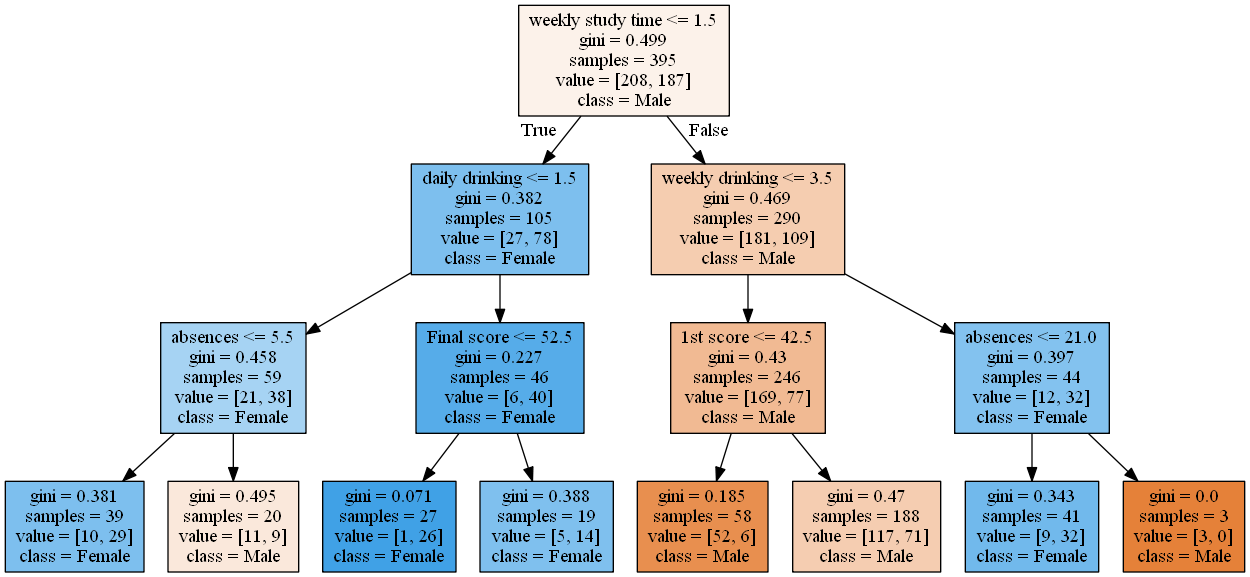

Decision Tree runtime: 0.44747424125671387


In [39]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)
decision_tree.fit(X,Y)
display(cross_val_score(decision_tree, X, Y, cv = 10))
dt_start_time = time.time()

dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X.columns, class_names=['Male', 'Female'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))
print ("Decision Tree runtime: {}".format(time.time() - dt_start_time))

array([0.625     , 0.525     , 0.675     , 0.7       , 0.75      ,
       0.75      , 0.875     , 0.66666667, 0.68421053, 0.76315789])

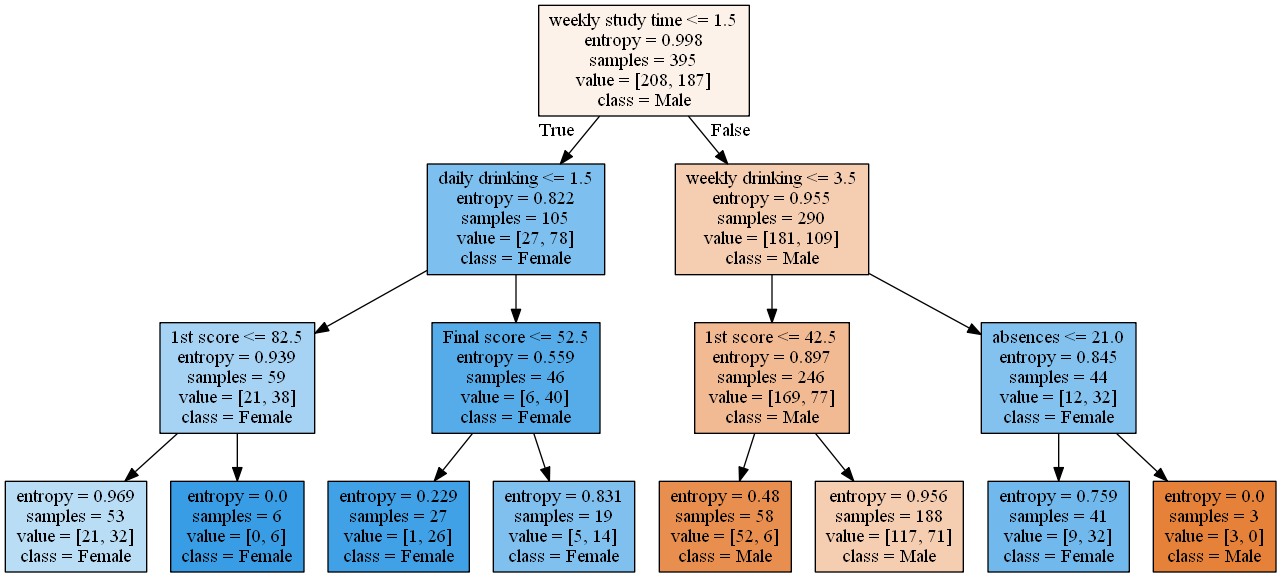

Decision Tree runtime: 0.4632987976074219


In [41]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
X = df.drop('sex',1)
Y = df['sex']
decision_tree.fit(X,Y)
display(cross_val_score(decision_tree, X, Y, cv = 10))
dt_start_time = time.time()

dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X.columns, class_names=['Male', 'Female'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))
print ("Decision Tree runtime: {}".format(time.time() - dt_start_time))

## Random Forest Model

In [38]:
rfc = ensemble.RandomForestClassifier()
X = df.drop('sex', 1)
Y = df['sex']
dt_start_time = time.time()

display(cross_val_score(rfc, X, Y, cv=10))
print ("Decision Tree runtime: {}".format(time.time() - dt_start_time))

array([0.725     , 0.525     , 0.625     , 0.575     , 0.7       ,
       0.775     , 0.625     , 0.66666667, 0.57894737, 0.71052632])

Decision Tree runtime: 0.31961846351623535


### After comparing the Decision tree and random forest models, we can see that the Random forest model has a faster runtime. Comparing the two accuracys, we see that the values were close, but the accuracy from the Random Forest model a higher than the Decision tree model. 